In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression,Lasso,RidgeClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [105]:
df = pd.read_csv('data/data.csv', sep=';')

In [106]:
df.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)

In [107]:
new_df = df.copy()
new_df = new_df.drop(columns=['Nationality', 
                                  'Mother\'s qualification', 
                                  'Father\'s qualification', 
                                  'Educational special needs', 
                                  'International', 
                                  'Curricular units 1st sem (without evaluations)',
                                  'Unemployment rate', 
                                  'Inflation rate'], axis=1)

In [108]:
new_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's occupation,Father's occupation,Admission grade,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target
0,1,17,5,171,1,1,122.0,5,9,127.3,...,0,0.000000,0,0,0,0,0.000000,0,1.74,Dropout
1,1,15,1,9254,1,1,160.0,3,3,142.5,...,6,14.000000,0,6,6,6,13.666667,0,0.79,Graduate
2,1,1,5,9070,1,1,122.0,9,9,124.8,...,0,0.000000,0,6,0,0,0.000000,0,1.74,Dropout
3,1,17,2,9773,1,1,122.0,5,3,119.6,...,6,13.428571,0,6,10,5,12.400000,0,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,9,9,141.5,...,5,12.333333,0,6,6,6,13.000000,0,0.79,Graduate


In [109]:
new_df['Target'] = new_df['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [110]:
X = new_df.drop('Target', axis=1)
y = new_df['Target']

In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [25]:
new_df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age                                                 int64
Curricular units 1st sem (credited)                 int64
Curricular uni

In [26]:
y

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int64

In [28]:
categorical_features = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance\t',
                        'Previous qualification', 'Mother\'s occupation', 'Father\'s occupation',
                        'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder']
numerical_features = ['Previous qualification (grade)', 'Admission grade', 'GDP', 'Age',
                       'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()  # Optional for numerical features

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ]
)

X = preprocessor.fit_transform(X)  # Apply preprocessing



In [111]:
X.shape

(4424, 28)

In [112]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [113]:
X_train.shape, X_test.shape

((3539, 28), (885, 28))

In [114]:
def evaluvate_model(true,predicted):
    accuracy = accuracy_score(true,predicted)
    precision = precision_score(true,predicted,average='weighted')
    recall = recall_score(true,predicted,average='micro')
    f1 = f1_score(true,predicted,average='weighted')
    #auc = roc_auc_score(true,predicted,multi_class='ovr')
    return accuracy,precision,recall,f1#,auc



In [115]:
estimators = [
    ('Logistic Regression', LogisticRegression()),
    ('KNeighbors', KNeighborsClassifier()),
    ('Decision Tree',DecisionTreeClassifier()),
    ('Random Forest Regressor', RandomForestClassifier()),
    ('XGBRegressor', XGBClassifier()), 
    ('CatBoosting Regressor', CatBoostClassifier(verbose=False)),
    ('AdaBoost Regressor', AdaBoostClassifier())
]


In [116]:


models ={
    "Logistic Regression": LogisticRegression(),
    # "Lasso": Lasso(alpha=0.1),
    # "Ridge": RidgeClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Regressor": RandomForestClassifier(),
    "XGBRegressor": XGBClassifier(), 
    "CatBoosting Regressor": CatBoostClassifier(verbose=False),
    "AdaBoost Regressor": AdaBoostClassifier(n_estimators=50,learning_rate=1),
   # "Voting Regressor" : VotingClassifier(estimators=estimators),
    "svm" : SVC(kernel='linear',probability=True)
}

In [117]:
list(models.values())[2]

DecisionTreeClassifier()

In [118]:
y_train.shape, y_train_pred.shape

((3539,), (3539,))

In [57]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [58]:
X_train.shape,y_train_pred.shape

((3539, 154), (3539,))

In [120]:
model_list = []
scores = []

for model_name, model in models.items():  # Iterate over dictionary items
  model.fit(X_train, y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  model_train_accuracy, model_train_precision, model_train_recall, model_train_f1 = evaluvate_model(y_train, y_train_pred)
  model_test_accuracy, model_test_precision, model_test_recall, model_test_f1 = evaluvate_model(y_test, y_test_pred)

  # Access model name from the dictionary using the loop variable
  print(model_name)
  model_list.append(model_name)

  # ... (rest of your code)

  print("Model Performance for Training set:")
  print("- Accuracy Score: {:.4f}".format(model_train_accuracy))
  print("- Precision: {:.4f}".format(model_train_precision))
  print("- Recall: {:.4f}".format(model_train_recall))
  print("- f1: {:.4f}".format(model_train_f1))
  #print("- auc: {:.4f}".format(model_train_auc))

  print('----------------------------------')


  print("Model Performance for Test set:")
  print("- Accuracy Score: {:.4f}".format(model_test_accuracy))
  print("- Precision: {:.4f}".format(model_test_precision))
  print("- Recall: {:.4f}".format(model_test_recall))
  print("- f1: {:.4f}".format(model_test_f1))
  #print("- auc: {:.4f}".format(model_test_auc))
  scores.append(model_test_recall)
  

  print('----------------------------------')
  print('='*35)
  print('\n')

c:\Users\nikil\anaconda3\envs\mlenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model Performance for Training set:
- Accuracy Score: 0.6539
- Precision: 0.6117
- Recall: 0.6539
- f1: 0.6135
----------------------------------
Model Performance for Test set:
- Accuracy Score: 0.6689
- Precision: 0.6131
- Recall: 0.6689
- f1: 0.6248
----------------------------------


K-Neighbors Classifier
Model Performance for Training set:
- Accuracy Score: 0.7841
- Precision: 0.7791
- Recall: 0.7841
- f1: 0.7741
----------------------------------
Model Performance for Test set:
- Accuracy Score: 0.6282
- Precision: 0.6084
- Recall: 0.6282
- f1: 0.6157
----------------------------------


Decision Tree
Model Performance for Training set:
- Accuracy Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- f1: 1.0000
----------------------------------
Model Performance for Test set:
- Accuracy Score: 0.6870
- Precision: 0.7002
- Recall: 0.6870
- f1: 0.6924
----------------------------------


Random Forest Regressor
Model Performance for Training set:
- Accuracy Sc

c:\Users\nikil\anaconda3\envs\mlenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Regressor
Model Performance for Training set:
- Accuracy Score: 0.7635
- Precision: 0.7481
- Recall: 0.7635
- f1: 0.7515
----------------------------------
Model Performance for Test set:
- Accuracy Score: 0.7740
- Precision: 0.7571
- Recall: 0.7740
- f1: 0.7622
----------------------------------


svm
Model Performance for Training set:
- Accuracy Score: 0.7674
- Precision: 0.7481
- Recall: 0.7674
- f1: 0.7467
----------------------------------
Model Performance for Test set:
- Accuracy Score: 0.7740
- Precision: 0.7509
- Recall: 0.7740
- f1: 0.7546
----------------------------------




In [121]:
scores

[0.6689265536723163,
 0.6282485875706215,
 0.6870056497175141,
 0.7807909604519774,
 0.7977401129943503,
 0.7796610169491526,
 0.7740112994350282,
 0.7740112994350282]

In [122]:
pd.DataFrame(list(zip(model_list, scores)), columns=['Model Name', 'Recall']).sort_values(by=["Recall"],ascending=False)

,Model Name,Recall
4,XGBRegressor,0.797740
3,Random Forest Regressor,0.780791
5,CatBoosting Regressor,0.779661
6,AdaBoost Regressor,0.774011
7,svm,0.774011
2,Decision Tree,0.687006
0,Logistic Regression,0.668927
1,K-Neighbors Classifier,0.628249


### XGB Classifier works well comparitively

In [126]:
XGB_model = XGBClassifier()
XGB_model = XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
score = recall_score(y_test, y_pred,average='weighted')*100
print(" Recall score of the model is %.2f" %score)

 Recall score of the model is 79.77


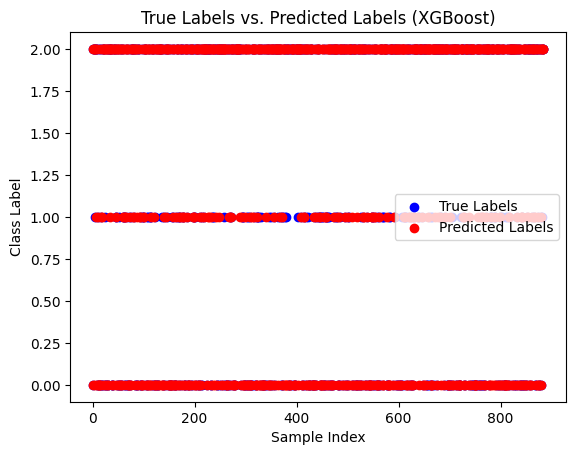

In [128]:
plt.scatter(range(len(y_test)), y_test, label="True Labels", color='blue')
plt.scatter(range(len(y_test)), y_pred, label="Predicted Labels", color='red')

# Set labels and title
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("True Labels vs. Predicted Labels (XGBoost)")

# Add legend
plt.legend()

# Show the plot
plt.show()

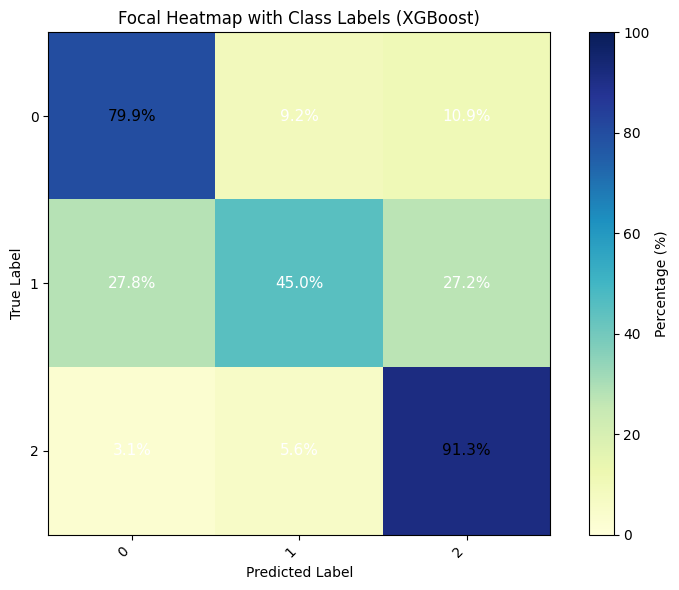

In [132]:
import numpy as np
cm = confusion_matrix(y_test, y_pred)

norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Normalize by column sums

# Create a new figure
plt.figure(figsize=(8, 6))

# Create focal heatmap with annotations (adjust colormap as desired)
plt.imshow(norm_cm, cmap='YlGnBu', vmin=0, vmax=100)
for i, row in enumerate(norm_cm):
    for j, val in enumerate(row):
        plt.text(j, i, f"{val:.1f}%", ha='center', va='center', fontsize=11, color='black' if val > 50 else 'white')  # Adjust threshold for text color

plt.colorbar(label='Percentage (%)')
plt.xticks(range(len(np.unique(y_test))), np.unique(y_test), rotation=45, ha='right')
plt.yticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Focal Heatmap with Class Labels (XGBoost)')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Feature Name')

c:\Users\nikil\anaconda3\envs\mlenv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\nikil\anaconda3\envs\mlenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


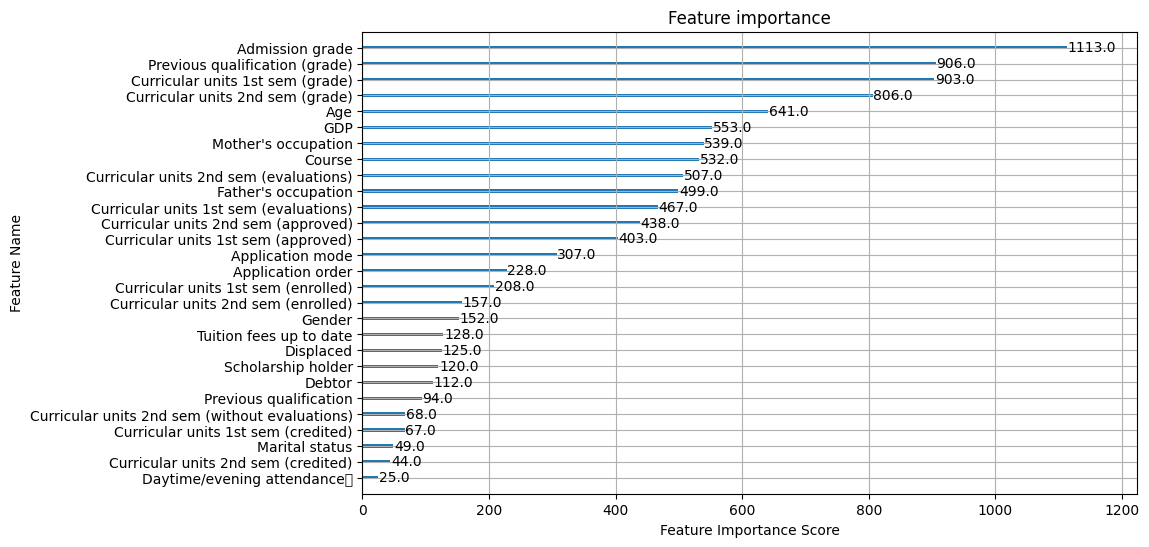

In [134]:
from xgboost import plot_importance

# Get feature importances
fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(XGB_model, ax=ax)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')